In [37]:
import pandas as pd
import numpy as np
import yfinance as yf

In [38]:
stock_symbol = 'GOOG'
df = yf.download(stock_symbol, start="2010-01-01", end="2025-03-01")

[*********************100%***********************]  1 of 1 completed


In [39]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2010-01-04,15.536651,15.605068,15.474429,15.541608,78541293
2010-01-05,15.468233,15.563671,15.407499,15.547310,120638494
2010-01-06,15.078297,15.514587,15.031197,15.514587,159744526
2010-01-07,14.727283,15.121432,14.691338,15.106558,257533695
2010-01-08,14.923613,14.954103,14.603584,14.675224,189680313


In [40]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2025-02-24,180.983810,184.879366,180.674166,183.590841,18734000
2025-02-25,177.168152,180.554293,176.568844,179.949986,20832500
2025-02-26,174.501190,177.877349,173.392453,176.743646,23637200
2025-02-27,170.016312,176.389041,169.558825,175.739787,25930500
2025-02-28,172.024017,172.303697,168.198374,170.106204,30049800


In [41]:
df1 = df['Close']

In [42]:
df1.shape

(3813, 1)

In [43]:
df1

Ticker,GOOG
Date,
2010-01-04,15.536651
2010-01-05,15.468233
2010-01-06,15.078297
2010-01-07,14.727283
2010-01-08,14.923613
...,...
2025-02-24,180.983810
2025-02-25,177.168152
2025-02-26,174.501190


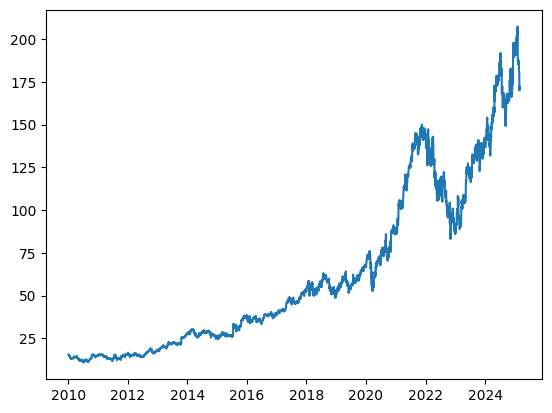

In [45]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
df1

array([[0.02403499],
       [0.02368709],
       [0.02170434],
       ...,
       [0.83234106],
       [0.80953626],
       [0.81974508]])

In [54]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [55]:
training_size,test_size

(2669, 1144)

In [56]:
import numpy 
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [57]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [58]:
print(X_train.shape), print(y_train.shape)

(2568, 100)
(2568,)


(None, None)

In [59]:
print(X_test.shape), print(ytest.shape)

(1043, 100)
(1043,)


(None, None)

In [60]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [64]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - loss: 1.0297e-04 - val_loss: 0.0025
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - loss: 8.8903e-05 - val_loss: 0.0021
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - loss: 9.3383e-05 - val_loss: 0.0019
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - loss: 9.3784e-05 - val_loss: 0.0034
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - loss: 9.5184e-05 - val_loss: 0.0031
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - loss: 8.1294e-05 - val_loss: 0.0027
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - loss: 8.0244e-05 - val_loss: 0.0027
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - loss: 7.7004e-05 - val_loss: 0.0016
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - loss: 9.5077e-05 - val_loss: 0.0041
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - loss: 7.7248e-05 - val_loss: 0.00

In [71]:
import tensorflow as tf

In [72]:
tf.__version__

'2.17.0'

In [73]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step


In [74]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [75]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

39.15390151040038

In [76]:
math.sqrt(mean_squared_error(ytest,test_predict))

132.04566608864226

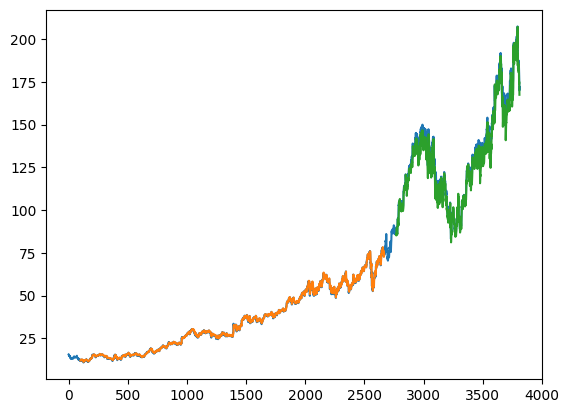

In [77]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [78]:
len(test_data)

1144

In [79]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 803)

In [80]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [81]:
temp_input

[0.6780397869750114,
 0.6677384021236586,
 0.6657064448451163,
 0.6749122067734747,
 0.6887207332837175,
 0.6896999739119387,
 0.6943634900516947,
 0.6861851510215935,
 0.6864711411139494,
 0.6839305932072484,
 0.6772351197889499,
 0.6792340244957767,
 0.6759040942777279,
 0.6416776131488794,
 0.6411587808787808,
 0.638393072025792,
 0.6463360860558619,
 0.653641480286968,
 0.6618930625745798,
 0.6491549428234636,
 0.6524723813418736,
 0.6347795569494792,
 0.6315482413292013,
 0.620690238756047,
 0.6034099508045251,
 0.6048269440374862,
 0.586423179000421,
 0.5990981419595734,
 0.5984959023782207,
 0.6195919778343711,
 0.6317835663292326,
 0.6428162199327432,
 0.6942243744153426,
 0.6669666323329198,
 0.6688163349378474,
 0.6481782626057275,
 0.6495698844984281,
 0.6609062958912966,
 0.646480322513184,
 0.6238457507083293,
 0.6297669715136003,
 0.6354628761961905,
 0.6408374105688138,
 0.6146273419039389,
 0.6053103185017773,
 0.5999204216662439,
 0.5907223797634388,
 0.616474484098381

In [82]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.6677384  0.66570644 0.67491221 0.68872073 0.68969997 0.69436349
 0.68618515 0.68647114 0.68393059 0.67723512 0.67923402 0.67590409
 0.64167761 0.64115878 0.63839307 0.64633609 0.65364148 0.66189306
 0.64915494 0.65247238 0.63477956 0.63154824 0.62069024 0.60340995
 0.60482694 0.58642318 0.59909814 0.5984959  0.61959198 0.63178357
 0.64281622 0.69422437 0.66696663 0.66881633 0.64817826 0.64956988
 0.6609063  0.64648032 0.62384575 0.62976697 0.63546288 0.64083741
 0.61462734 0.60531032 0.59992042 0.59072238 0.61647448 0.62581696
 0.627697   0.62403801 0.62699094 0.62474647 0.61368348 0.58505173
 0.58917128 0.62250953 0.61651755 0.60535074 0.58645099 0.60122623
 0.62162137 0.62622685 0.63736565 0.63573102 0.65495722 0.64597926
 0.66019264 0.66125296 0.66342155 0.67000056 0.66693622 0.65177905
 0.6570954  0.67198698 0.65893253 0.63926097 0.63566267 0.62324095
 0.60191452 0.59471794 0.60439175 0.58904217 0.59262527 0.60563161
 0.59406511 0.57732383 0.55038241 0.56878362 0.549

ValueError: cannot reshape array of size 802 into shape (1,100,1)

In [83]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [91]:
len(df1)

3813

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

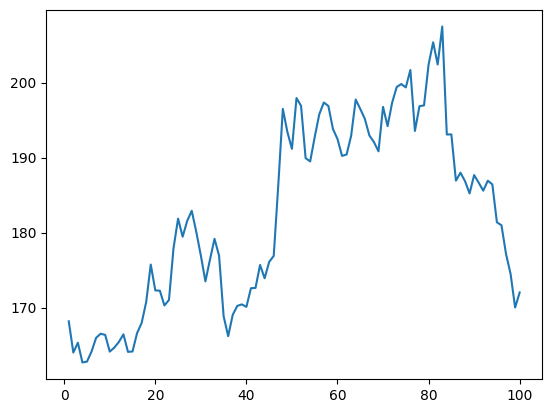

In [96]:
plt.plot(day_new,scaler.inverse_transform(df1[3713:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

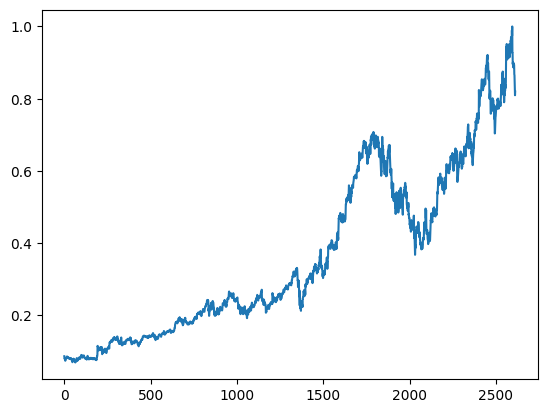

In [88]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [89]:
df3=scaler.inverse_transform(df3).tolist()

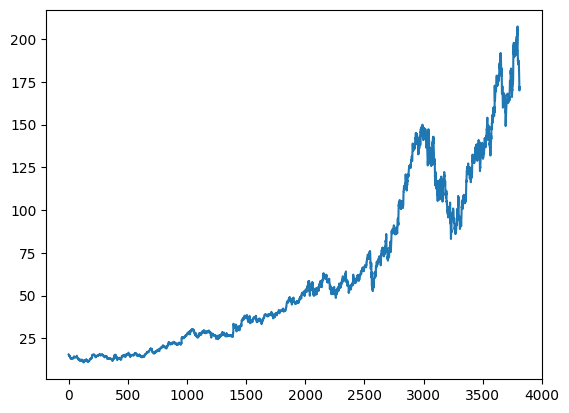

In [90]:
plt.plot(df3)